<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.----DT-Ensemble/blob/main/Bagging_Boosting_Project/Mahfuzur_Bagging_Boosting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the Business Problem
TalkingData is a Chinese big data company, and one of their areas of expertise is mobile advertisements.

In mobile advertisements, click fraud is a major source of losses. Click fraud is the practice of repeatedly clicking on an advertisement hosted on a website with the intention of generating revenue for the host website or draining revenue from the advertiser.

In this case, TalkingData happens to be serving the advertisers (their clients). TalkingData cover a whopping approx. 70% of the active mobile devices in China, of which 90% are potentially fraudulent (i.e. the user is actually not going to download the app after clicking).

You can imagine the amount of money they can help clients save if they are able to predict whether a given click is fraudulent (or equivalently, whether a given click will result in a download).

Their current approach to solve this problem is that they've generated a blacklist of IP addresses - those IPs which produce lots of clicks, but never install any apps. Now, they want to try some advanced techniques to predict the probability of a click being genuine/fraud.

In this problem, we will use the features associated with clicks, such as IP address, operating system, device type, time of click etc. to predict the probability of a click being fraud.



# Project on Bagging and Boosting ensemble model:


**The data contains observations of about 240 million clicks, and whether a given click resulted in a download or not (1/0):**

The detailed data dictionary is mentioned here:
- ```ip```: ip address of click.
- ```app```: app id for marketing.
- ```device```: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
- ```os```: os version id of user mobile phone
- ```channel```: channel id of mobile ad publisher
- ```click_time```: timestamp of click (UTC)
- ```attributed_time```: if user download the app for after clicking an ad, this is the time of the app download
- ```is_attributed```: the target that is to be predicted, indicating the app was downloaded

Let's try finding some useful trends in the data.

    **1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**

    **2. Which column has maximum number of unique values present among all the available columns**

    **3. Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less than 20% clicks) and plot the rest..** 

    **4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**

    **5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and
         check the average download rates('is_attributed') for train and test data, scores should be comparable.**

    **6. Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data. NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.** 

    **7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**

    **8. Compute feature importance score and name the top 5 features/columns .**
    
    **9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.
    
    **10.  On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and why?What does AUC/ROC score signifies?
    
    **11.  What is the accuracy for BaggingClassifier and XGBoostClassifier?()
 ### All the Best!!!

In [1]:
url = 'https://raw.githubusercontent.com/Tech-i-s/techis-ds-wiki/master/Step%203-3%20DT%20and%20Ensemble/03_Project/talking_data.csv?token=AM2M2N3SV3XMXPWSPKRT6MDAIKW4S'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(url)
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
df.isnull().sum()#attributed time has too many null values

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [5]:
df = df.drop(columns='attributed_time')#lets drop this column

In [6]:
df.shape

(100000, 7)

In [7]:
df.dtypes

ip                int64
app               int64
device            int64
os                int64
channel           int64
click_time       object
is_attributed     int64
dtype: object

In [8]:
df.apply(pd.value_counts).count() # counting how many unique values in a column
# looks like click time and ip has the top 2 unique items

ip               34857
app                161
device             100
os                 130
channel            161
click_time       80350
is_attributed        2
dtype: int64

In [9]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [10]:
df.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [11]:
df.tail()

,ip,app,device,os,channel,click_time,is_attributed
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0
99999,119349,14,1,15,401,2017-11-07 14:32:27,0


In [12]:
df['click_time'] = pd.to_datetime(df['click_time'])

In [13]:
type(df['click_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df['app'].value_counts()[:31]  # these are the top apps

3      18279
12     13198
2      11737
9       8992
15      8595
18      8315
14      5359
1       3135
13      2422
8       2004
21      1979
11      1927
26      1633
23      1454
6       1303
64      1079
7        981
20       911
25       804
28       720
24       704
27       696
19       478
10       388
22       386
17       380
29       360
32       286
5        188
151      109
36       102
Name: app, dtype: int64

In [15]:
# top_apps = [] # make an empty list
# x = df['app'].value_counts(ascending=False)[:16] # these are the top apps
# x = list(x.index.values) # make it into a list so we can filter it out
# top_apps.append(x)

In [16]:
# top_apps = top_apps[0]
# top_apps # these are the list of the top apps 

In [17]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


## First Approach to dropping useless apps


In [18]:
app_counts = df['app'].value_counts()
app_counts# here we are trying to see which apps has the most counts

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64

In [19]:
app_counts = app_counts[app_counts > 100]
app_counts# I am only selecting the popular apps

3      18279
12     13198
2      11737
9       8992
15      8595
18      8315
14      5359
1       3135
13      2422
8       2004
21      1979
11      1927
26      1633
23      1454
6       1303
64      1079
7        981
20       911
25       804
28       720
24       704
27       696
19       478
10       388
22       386
17       380
29       360
32       286
5        188
151      109
36       102
Name: app, dtype: int64

In [20]:
req_apps = app_counts.index # we are calling the index so we can grab the apps

In [21]:
req_apps

Int64Index([  3,  12,   2,   9,  15,  18,  14,   1,  13,   8,  21,  11,  26,
             23,   6,  64,   7,  20,  25,  28,  24,  27,  19,  10,  22,  17,
             29,  32,   5, 151,  36],
           dtype='int64')

In [22]:
filtered_df = [] # empty list
for app_id in req_apps:
  filtered_df.append(df.loc[df['app']==app_id])# only appends the columns with included apps
# after appending we need to attach all the dataframes together
df_final = pd.concat(filtered_df)

In [23]:
df_final.head()# here is the final df

,ip,app,device,os,channel,click_time,is_attributed
5,93663,3,1,17,115,2017-11-09 01:22:13,0
9,143636,3,1,19,135,2017-11-08 12:35:26,0
10,73839,3,1,22,489,2017-11-08 08:14:37,0
11,34812,3,1,13,489,2017-11-07 05:03:14,0
12,114809,3,1,22,205,2017-11-09 10:24:23,0


In [24]:
df_final.shape

(98904, 7)

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98904 entries, 5 to 97687
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ip             98904 non-null  int64         
 1   app            98904 non-null  int64         
 2   device         98904 non-null  int64         
 3   os             98904 non-null  int64         
 4   channel        98904 non-null  int64         
 5   click_time     98904 non-null  datetime64[ns]
 6   is_attributed  98904 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 6.0 MB


## My second Approach

In [26]:
# function to filter the apps
def app_filter(app_id):
  if app_id in req_apps:
    return app_id
  else:
    return np.nan # if the app is not a popular app then use nan
df['app'] = df['app'].apply(app_filter)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ip             100000 non-null  int64         
 1   app            98904 non-null   float64       
 2   device         100000 non-null  int64         
 3   os             100000 non-null  int64         
 4   channel        100000 non-null  int64         
 5   click_time     100000 non-null  datetime64[ns]
 6   is_attributed  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 5.3 MB


In [28]:
df = df.dropna() # its easy to drop the nan

In [29]:
df.shape

(98904, 7)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98904 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ip             98904 non-null  int64         
 1   app            98904 non-null  float64       
 2   device         98904 non-null  int64         
 3   os             98904 non-null  int64         
 4   channel        98904 non-null  int64         
 5   click_time     98904 non-null  datetime64[ns]
 6   is_attributed  98904 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 6.0 MB


In [31]:
# let's feature engineer the new features for date time
df['day_of_week'] = df['click_time'].apply(lambda x: x.dayofweek)
df['day_of_year'] = df['click_time'].apply(lambda x: x.dayofyear)
df['month'] = df['click_time'].apply(lambda x: x.month)
df['hour'] = df['click_time'].apply(lambda x: x.hour)
df = df.drop('click_time', axis = 1) # dropping the click time column since we have everything
df['app'] = df['app'].astype('int64') # converting app to int since it turned into a float from our nan values
df.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9


''

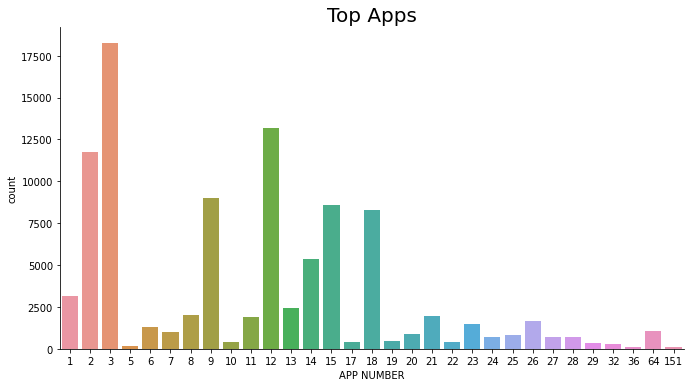

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x = 'app',kind = 'count', data=df, aspect=1.9)
plt.title('Top Apps', fontsize = 20)
plt.xlabel('APP NUMBER')
;

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = .2, random_state = 3)
print(train.shape)
print(test.shape)

(79123, 10)
(19781, 10)


In [34]:
x_train = train.drop(['is_attributed'], axis=1)
y_train = train['is_attributed']
x_test = test.drop(['is_attributed'], axis=1)
y_test = test['is_attributed']

In [35]:
x_train.shape, y_train.shape

((79123, 9), (79123,))

In [36]:
x_test.shape, y_test.shape

((19781, 9), (19781,))

In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [38]:
def get_score(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  return model.score(x_test, y_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier  
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight = {0:.5, 1:.5}, max_depth = 5, min_samples_leaf = 5)
rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [40]:
rfcl.fit(x_train, y_train)
rfcl.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
get_score(rfcl, x_train, x_test, y_train, y_test)

0.998635053839543

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
get_score(xgb, x_train, x_test, y_train, y_test)

0.998635053839543

In [44]:
pred = xgb.predict(x_test)

In [45]:
y_pred = xgb.predict_proba(x_test)

In [46]:
y_pred = y_pred[:,1] # keep the positives
y_pred

array([0.00044212, 0.00056443, 0.00158417, ..., 0.00053903, 0.00046639,
       0.00010173], dtype=float32)

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
# calculate scores
auc = roc_auc_score(y_test, pred)
# summarize scores
print('XGB: ROC AUC=%.3f' % (auc))

XGB: ROC AUC=0.500


In [48]:
from sklearn.metrics import accuracy_score
xgb_acc_score = accuracy_score(y_test, pred)
xgb_acc_score

0.998635053839543

In [49]:
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, y_pred)

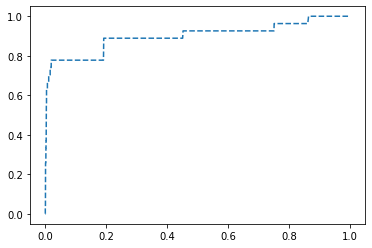

In [50]:
plt.plot(fpr,tpr, linestyle='--', label='XGB');

In [51]:
# get the feature importace
importance = xgb.feature_importances_
importance

array([0.12822099, 0.17989366, 0.17752412, 0.08216326, 0.35055494,
       0.05050439, 0.        , 0.        , 0.03113866], dtype=float32)

In [52]:
for i, v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i, v))

Feature: 0, Score: 0.12822
Feature: 1, Score: 0.17989
Feature: 2, Score: 0.17752
Feature: 3, Score: 0.08216
Feature: 4, Score: 0.35055
Feature: 5, Score: 0.05050
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.03114


In [53]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'day_of_week',
       'day_of_year', 'month', 'hour'],
      dtype='object')

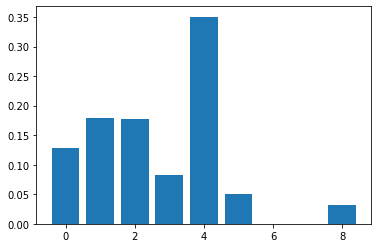

In [54]:
plt.bar([x for x in range(len(importance))], importance);

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
# here I am implementing the bagging classifier model
bagcl = BaggingClassifier(base_estimator = logreg)
bagcl.fit(x_train, y_train)
pred = bagcl.predict(x_test)

In [58]:
bagcl_acc_score = accuracy_score(y_test, pred)
bagcl_acc_score

0.998635053839543

In [59]:
y_proba = bagcl.predict_proba(x_test)
y_proba = y_proba[:, 1]
y_proba

array([0.00135064, 0.00141459, 0.00057914, ..., 0.00121514, 0.00137489,
       0.00029066])

In [60]:
bauc = roc_auc_score(y_test, y_proba)
print('bagcl: ROC AUC  = %.3f'% bauc)

bagcl: ROC AUC  = 0.650


In [61]:
print('On the basis of the AUC ROC Score I would choose XGBoostClassifier(), \n\
because it gave a score of well over %.3f that means that the area under the \n\
curve is much larger compared to the score of BaggingClassifier() which was \n\
only %.3f'%(auc, bauc))

On the basis of the AUC ROC Score I would choose XGBoostClassifier(), 
because it gave a score of well over 0.500 that means that the area under the 
curve is much larger compared to the score of BaggingClassifier() which was 
only 0.650


In [62]:
print(f'The accuracy score of the XGBoost model is : {xgb_acc_score}')
print(f'The accuracy score of the BaggingClassifier model is {bagcl_acc_score}')

The accuracy score of the XGBoost model is : 0.998635053839543
The accuracy score of the BaggingClassifier model is 0.998635053839543
